In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"  # specify which GPU(s) to be used

In [2]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../src')

from dataset import DatasetConfig, DatasetBuilder
import os
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import defaultdict, namedtuple
from typing import Callable, Dict, List, Tuple
from trainer import Trainer, TrainerConfig
import jax
from jax import random
import jax.numpy as jnp
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
ds_config =  DatasetConfig(model_dir='../dataset/pinecone/sparse_8/0/',
                           images_dir='../dataset/pinecone/images_8/',
                           batch_from_single_image=True,
                           train_batch_size=2048, test_batch_size=-1)
trainer_config = TrainerConfig(dataset_config=ds_config)

trainer = Trainer(trainer_config)
train_iter, val_iter = trainer.create_dataset()

In [17]:
def mae_loss(pred: jnp.ndarray, gd: jnp.ndarray, weights: jnp.ndarray=1.0):
    errors = jnp.abs(pred - gd) * weights
    return errors.mean()

rng = random.PRNGKey(1122546)
pred = random.uniform(rng, (100, 3))
gt = random.uniform(rng, (100, 3))

mae_loss(pred, gt)

DeviceArray(0., dtype=float32)

In [4]:
data = []
for step, rays in zip(range(1), train_iter):
    data.append(rays)

In [13]:
jnp.max(rays.weights[~jnp.isnan(rays.weights)])

DeviceArray(1.999848, dtype=float32)

In [21]:
import dataset_utils

coord = list(range(10))
X, Y = tf.meshgrid(coord, coord)
Z = tf.zeros_like(X)
image = tf.stack((X, Y, Z), axis=-1)
query_points = np.array([[1, 1], [5, 5], [11, 10]]) + 0.5
dataset_utils.interpolate_bilinear(image, query_points)

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[ 1.5,  1.5,  0. ],
       [ 5.5,  5.5,  0. ],
       [11.5, 10.5,  0. ]])>

In [45]:
k1,k2 = 

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dtype=int32)>

In [30]:
rng = random.PRNGKey(1122546)
random.uniform(rng)

DeviceArray(0.5480349, dtype=float32)

In [34]:
random.uniform(rng)

DeviceArray(0.5480349, dtype=float32)

In [39]:
k1, k2 = random.split(rng)
random.uniform(k1), random.uniform(k2)

(DeviceArray(0.97652817, dtype=float32),
 DeviceArray(0.21583843, dtype=float32))

In [45]:
k1, k2 = random.split(rng)
random.uniform(k1), random.uniform(k2)

(DeviceArray(0.97652817, dtype=float32),
 DeviceArray(0.21583843, dtype=float32))

In [20]:
points = []
colors = []
weights = []
for step, rays in zip(range(100), train_iter):
    depths = rays.depths
    valid_idx = (depths != np.nan).flatten()
    depth = valid_idx[valid_idx]
        
    colors.append(rays.colors[0, valid_idx, :])
    weights.append(rays.weights[0, valid_idx, :])
    origins = rays.origins[0, valid_idx, :]
    directions = rays.directions[0, valid_idx, :]

    points.append(origins + directions * depths)
    weights.append(rays.weights[0, valid_idx])
    
points = np.concatenate(points, axis=0)
colors = np.concatenate(colors, axis=0)
weights = np.concatenate(weights, axis=0)

ValueError: Incompatible shapes for broadcasting: ((1, 2048, 3), (2, 1024, 1))

In [4]:
import plotly.graph_objects as go

x = points[..., 0].flatten()
y = points[..., 1].flatten()
z = points[..., 2].flatten()

data = []
data.append(go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=colors,                # set color to an array/list of desired values
        opacity=1.0
    )
))

fig = go.Figure(data)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

NameError: name 'points' is not defined

In [16]:
jnp.abs(10)

DeviceArray(10, dtype=int32)

In [11]:
from read_write_model import read_model, qvec2rotmat
import read_write_model
import numpy as np

cameras_meta, images_meta, points_3d_meta = read_model('../dataset/pinecone/sparse/0/', ext=".bin")

In [20]:
scale_factor = 484. / 4032.
new_width = 484
new_height = 363

new_cameras = {}
new_images = {}
new_points_3d= {}

for key, val in cameras_meta.items():
    params = val.params * scale_factor
    new_cameras[key] = read_write_model.Camera(id=val.id,
                                               model=val.model,
                                               width=new_width,
                                               height=new_height,
                                               params=params)
    new_cameras[key] = camera
    
for key, val in images_meta.items():
    xys = val.xys * scale_factor
    name = val.name.replace('JPG', 'png')
    new_images[key] = read_write_model.Image(id=val.id,
                                             qvec=val.qvec,
                                             tvec=val.tvec,
                                             camera_id=val.camera_id,
                                             name=name,
                                             xys=xys,
                                             point3D_ids=val.point3D_ids)


In [22]:
read_write_model.write_model(new_cameras, new_images, points_3d_meta, '../dataset/pinecone/sparse_8/0/')

({1: Camera(id=1, model='SIMPLE_RADIAL', width=484, height=363, params=array([4.01681963e+02, 2.42000000e+02, 1.81500000e+02, 8.38353114e-04]))},
 {1: Image(id=1, qvec=array([ 0.8283521 ,  0.01728801, -0.50204246,  0.24796631]), tvec=array([2.83913768, 0.04884715, 2.37824897]), camera_id=1, name='IMG_7238.png', xys=array([[217.83716365,   0.71120807],
         [297.36883109,   0.92682258],
         [ 85.31013041,   1.3790272 ],
         ...,
         [330.73186214, 175.14756799],
         [330.73186214, 175.14756799],
         [434.19121007, 126.98985121]]), point3D_ids=array([-1, -1, -1, ..., -1, -1, -1])),
  2: Image(id=2, qvec=array([ 0.84138363,  0.01751645, -0.48335613,  0.24110913]), tvec=array([2.50813483, 0.03444171, 2.42898373]), camera_id=1, name='IMG_7239.png', xys=array([[192.07795485,   0.69992309],
         [414.14502268,   0.99376232],
         [ 71.38773255,   1.28144756],
         ...,
         [ 56.31203352, 266.53401862],
         [274.0852649 , 276.07506331],
      

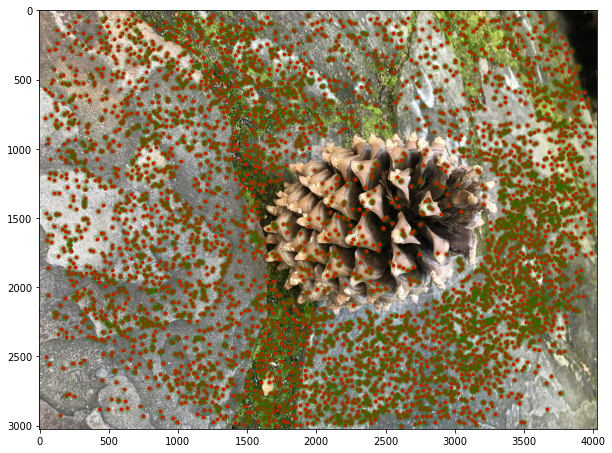

In [16]:
iid = 1
image_filename = os.path.join('../dataset/pinecone/images/', images_meta[iid].name)
image = tf.image.decode_image(tf.io.read_file(image_filename), channels=3)
points_2d = images_meta[iid].xys

plt.imshow(image)
# plt.plot(points_2d[:, 0], points_2d[:, 1], 'r.')

camera_meta = cameras_meta[images_meta[iid].camera_id]
params = camera_meta.params
width = camera_meta.width
height = camera_meta.height
rotation = qvec2rotmat(images_meta[iid].qvec)
translation = tf.expand_dims(images_meta[iid].tvec, -1)

points_idx = images_meta[iid].point3D_ids
points_idx_valid = points_idx[points_idx != -1]
points_3d = np.array([points_3d_meta[i].xyz for i in points_idx_valid])

fx = fy = params[0]
cx, cy = params[1:3]
K = np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]])
points_3d_cam = (K @ (rotation @ points_3d.T + translation)).T
x = points_3d_cam[..., 0] / points_3d_cam[..., -1]
y = points_3d_cam[..., 1] / points_3d_cam[..., -1]

plt.plot(x, y, 'r.')

points_2d = points_2d[points_idx != -1, :]
x = points_2d[:, 0]
y = points_2d[:, 1]

plt.plot(x, y, 'go', alpha=0.2)

In [32]:
params

array([3.34624313e+03, 2.01600000e+03, 1.51200000e+03, 6.98396644e-03])

In [31]:
rays.directions[0, 1024, :]

DeviceArray([ 0.81496537, -0.17342596,  0.55293304], dtype=float32)

In [30]:
direction = np.array([x[0] - cx, y[0]- cy, fx])
direction = direction / tf.norm(direction)
rotation.T @ direction

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 0.52010877, -0.45726625,  0.7213837 ])>

In [29]:
d = points_3d[0] + (rotation.T @ translation).T
d = d / tf.norm(d)
d

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[ 0.5206421 , -0.45687611,  0.72124616]])>

In [24]:
rotation.T @ translation

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[ 3.07648985],
       [-1.6968286 ],
       [-1.17266358]])>

In [16]:
num_samples = 100
points_2d = images_meta[1].xys
points_idx = images_meta[1].point3D_ids

valid_idx = points_idx != -1
points_2d = points_2d[valid_idx]
points_idx = points_idx[valid_idx]

idxs = tf.range(tf.shape(points_2d)[0])
ridxs = tf.random.shuffle(idxs)[:num_samples]

points_2d = points_2d[ridxs, :]
points_idx = points_idx[ridxs]

In [18]:
points_2d.shape

(100, 2)

In [19]:
points_idx.shape

(100,)

In [121]:
image_meta = images[1]
points_2d = image_meta.xys
points_idx = image_meta.point3D_ids
valid_idx = points_idx != -1
points_2d = points_2d[valid_idx]
points_idx = points_idx[valid_idx]
weights = np.array([points3D[idx].error for idx in points_idx])

In [123]:
weights.shape

(5072,)

In [128]:
tf.convert_to_tensor(weights[..., None])

<tf.Tensor: shape=(5072, 1), dtype=float64, numpy=
array([[0.95010879],
       [2.27108173],
       [0.49718864],
       ...,
       [2.24264669],
       [1.85001739],
       [2.45816851]])>

In [68]:
points3D[images[1].point3D_ids[idx][0]]

Point3D(id=46215, xyz=array([-0.35774539, -0.68893584,  4.93894376]), rgb=array([0, 0, 0]), error=array(0.95010879), image_ids=array([5, 4, 3, 2, 1]), point2D_idxs=array([1003,  683,  364,  168,   26]))

In [35]:
jnp.ones_like(x) * jnp.nan

DeviceArray([[nan, nan, nan],
             [nan, nan, nan],
             [nan, nan, nan]], dtype=float32)

In [29]:
points3D[1]

Point3D(id=1, xyz=array([ 0.80476486, -3.12924099,  5.51971731]), rgb=array([0, 0, 0]), error=array(0.24492585), image_ids=array([11, 13]), point2D_idxs=array([1, 3]))

In [ ]:
points3D[]

In [9]:
from typing import Union, NamedTuple

class Rays(NamedTuple):
    origins: Union[tf.Tensor, np.ndarray, jnp.ndarray]
    directions: Union[tf.Tensor, np.ndarray, jnp.ndarray]
    colors: Union[tf.Tensor, np.ndarray, jnp.ndarray]
    depth: Union[tf.Tensor, np.ndarray, jnp.ndarray] = jnp.nan
    weights: Union[tf.Tensor, np.ndarray, jnp.ndarray] = jnp.nan

21.486677055282442


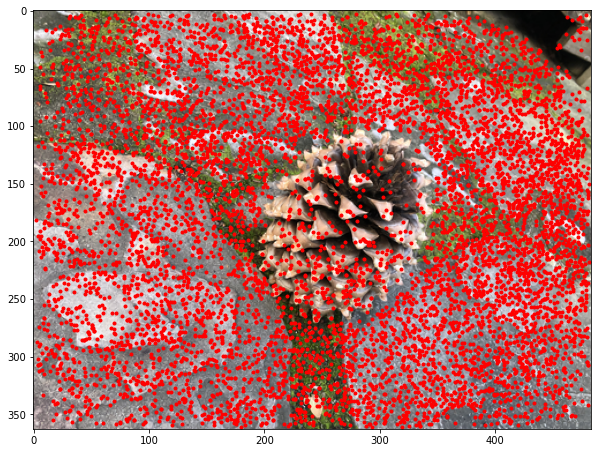

In [109]:
iid = 30
idx = images[iid].point3D_ids
points = []
for i in idx:
    if i != -1:
        points.append(points3D[i].xyz)
        
points = np.array(points)
rotation = qvec2rotmat(images[iid].qvec)
points_cam = (np.matmul(rotation, points.T) + images[iid].tvec[..., np.newaxis]).T

camera = cameras[images[iid].camera_id]
focal, cx, cy, _ = camera.params
intrinsics = np.eye(3)

ratio = 4032 / 484
intrinsics[0, 0] = focal / ratio
intrinsics[1, 1] = focal / ratio
intrinsics[0, -1] = cx / ratio
intrinsics[1, -1] = cy / ratio

pixels = np.matmul(intrinsics, points_cam.T).T
pixels = pixels[..., :2] / pixels[..., -1:]

img_path = os.path.join('../dataset/pinecone/images_8/', images[iid].name)
img = tf.image.decode_image(tf.io.read_file(img_path.replace('JPG', 'png')), channels=3)

plt.imshow(img)
_ = plt.plot(pixels[..., 0], pixels[..., 1], 'r.')

z = points_cam[..., -1]
print(np.max(z))

In [13]:
x.shape, encode0.shape

((100, 50, 3), (100, 50, 63))

In [5]:
np.isclose(encode0, encode1)

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [19]:
data[0]

Rays(origins=ShardedDeviceArray([[[-1.9229347, -3.0000927,  3.3044224],
                     [-1.9229347, -3.0000927,  3.3044224]]],                   dtype=float32), directions=ShardedDeviceArray([[[0.41802984, 0.74335635, 0.5221644 ],
                     [0.34140566, 0.47233826, 0.8126053 ]]],                   dtype=float32), colors=ShardedDeviceArray([[[0.47058827, 0.48627454, 0.47058827],
                     [0.627451  , 0.60784316, 0.6039216 ],
                     [0.34509805, 0.35686275, 0.2784314 ],
                     [1.        , 1.        , 1.        ]]],                   dtype=float32), depth=None, weights=None)

In [10]:
tmp._numpy()

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

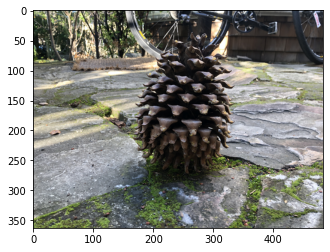

In [13]:
img = np.reshape(data[0].colors, [363, 484, 3])
plt.imshow(img)

In [16]:
np.min(img)

DeviceArray(0., dtype=float32)

In [9]:
lines = []
colors = []

def make_line(origin, direction, length=10):
    return origin, origin + direction * length

for elements in train_iter:
    origins = elements.origins
    directions = elements.directions
    pixels = elements.colors
    N = origins.shape[0]
    for i in range(N):
        p0, p1 = make_line(origins[i, ...], directions[i, ...])
        lines.append(p0)
        lines.append(p1)
        colors.append(pixels[i, ...])

UnknownError: NotFoundError: ../dataset/pinecone/images_8/IMG_7238.JPG; No such file or directory [Op:ReadFile]
Traceback (most recent call last):

  File "/home/liangkai/.local/lib/python3.6/site-packages/tensorflow/python/ops/script_ops.py", line 247, in __call__
    return func(device, token, args)

  File "/home/liangkai/.local/lib/python3.6/site-packages/tensorflow/python/ops/script_ops.py", line 135, in __call__
    ret = self._func(*args)

  File "/home/liangkai/.local/lib/python3.6/site-packages/tensorflow/python/autograph/impl/api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "../src/dataset.py", line 82, in _parse_single_image
    image = tf.image.decode_image(tf.io.read_file(image_filename), channels=3)

  File "/home/liangkai/.local/lib/python3.6/site-packages/tensorflow/python/ops/io_ops.py", line 139, in read_file
    return gen_io_ops.read_file(filename, name)

  File "/home/liangkai/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 556, in read_file
    filename, name=name, ctx=_ctx)

  File "/home/liangkai/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 579, in read_file_eager_fallback
    attrs=_attrs, ctx=ctx, name=name)

  File "/home/liangkai/.local/lib/python3.6/site-packages/tensorflow/python/eager/execute.py", line 60, in quick_execute
    inputs, attrs, num_outputs)

tensorflow.python.framework.errors_impl.NotFoundError: ../dataset/pinecone/images_8/IMG_7238.JPG; No such file or directory [Op:ReadFile]


	 [[{{node EagerPyFunc}}]] [Op:IteratorGetNext]

In [8]:
elements

ColoredRays(origins=array([[-1.3584163,  2.8891244, -0.7654388],
       [-1.3584163,  2.8891244, -0.7654388],
       [-1.3584163,  2.8891244, -0.7654388],
       [-1.3584163,  2.8891244, -0.7654388],
       [-1.3584163,  2.8891244, -0.7654388],
       [-1.3584163,  2.8891244, -0.7654388],
       [-1.3584163,  2.8891244, -0.7654388],
       [-1.3584163,  2.8891244, -0.7654388]], dtype=float32), directions=array([[ 0.21775223,  0.36321905,  0.9058935 ],
       [ 0.48083252,  0.4632607 ,  0.74443144],
       [ 0.67416   ,  0.4551204 ,  0.5816901 ],
       [ 0.19054098,  0.37953192,  0.9053382 ],
       [ 0.5216486 ,  0.24016047,  0.8186518 ],
       [ 0.5905296 , -0.33727977,  0.7331424 ],
       [ 0.46349207,  0.44260776,  0.7676338 ],
       [ 0.3815262 , -0.24660194,  0.89084554]], dtype=float32), colors=array([[0.69411767, 0.6745098 , 0.69803923],
       [0.26666668, 0.30980393, 0.18431373],
       [0.30588236, 0.3137255 , 0.3019608 ],
       [0.654902  , 0.65882355, 0.6666667 ],
    

In [7]:
data = np.asarray(lines)
np.save('lines.npy', data)

colors = np.asarray(colors)
np.save('colors.npy', colors)

In [9]:
from read_write_model import read_model, qvec2rotmat

In [10]:
cameras_meta, images_meta, points = read_model("../dataset/pinecone/sparse/0/", ext=".bin")

In [15]:
cameras_meta[1].params

array([3.34624313e+03, 2.01600000e+03, 1.51200000e+03, 6.98396644e-03])

In [22]:
R = qvec2rotmat(images_meta[1].qvec)

In [24]:
from scipy.spatial.transform import Rotation as R

In [25]:
r = R.from_quat(images_meta[1].qvec)

In [33]:
r.as_matrix()

array([[ 0.49530899,  0.27762036, -0.82316216],
       [-0.22033811, -0.87642766, -0.42816547],
       [-0.84030954,  0.3934482 , -0.37293215]])

In [32]:
r.as_rotvec()

array([ 2.2577188 ,  0.04711942, -1.36834409])

In [21]:
images_meta[1]

Image(id=1, qvec=array([ 0.8283521 ,  0.01728801, -0.50204246,  0.24796631]), tvec=array([2.83913768, 0.04884715, 2.37824897]), camera_id=1, name='IMG_7238.JPG', xys=array([[1814.70959473,    5.92477465],
       [2477.25439453,    7.72096825],
       [ 710.68273926,   11.48809433],
       ...,
       [2755.18774414, 1459.08056641],
       [2755.18774414, 1459.08056641],
       [3617.06396484, 1057.89892578]]), point3D_ids=array([-1, -1, -1, ..., -1, -1, -1]))